r1: -0.16972243622680058, r2: 0.0, dr1:0.0, dr2: 0.0, ddr1: 0.1802775637731994, ddr2: 2.28846153846154 


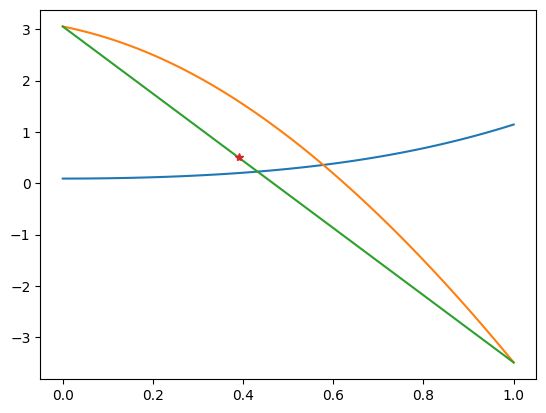

In [5]:
import numpy as np 
import flexring as flx 
from euclid3 import Vector2
import matplotlib.pyplot as plt
def interpolate_boundary_condition(centre:Vector2,
                                   radius:float,
                                   point1:Vector2,
                                   point2:Vector2,
                                   dydx:float,
                                   ddydx:float,
                                   beta:float,
                                   direction:int):
    # given a chord or a semi chord on a circle, finds the 
    # point along the chord where separation happens
    dr_1 = (point1 - centre).magnitude() - radius
    dr_2 = (point2 - centre).magnitude() - radius
    dr_dtheta_1 = flx.polar_derivative(point= point1 - centre,dy=dydx)
    dr_dtheta_2 = flx.polar_derivative(point= point2- centre,dy= dydx)
    ddr_dtheta_1 = flx.polar_second_derivative(point1 - centre,dydx,ddydx)
    ddr_dtheta_2 = flx.polar_second_derivative(point2 - centre, dydx,ddydx)                                           
    print(f"r1: {dr_1}\nr2: {dr_2}\ndr1:{dr_dtheta_1}\ndr2: {dr_dtheta_1}\nddr1: {ddr_dtheta_1}\nddr2: {ddr_dtheta_2}")
    
    # condition is true when lhs > rhs
    # we calculate lhs and rhs at point1 and point2 and linearly interpolate
    # to find the point where they cross
    lhs_1 = 0.5*ddr_dtheta_1
    lhs_2 = 0.5*ddr_dtheta_2
    rhs_1 = -2*(beta**2)*(direction*dr_dtheta_1/beta + dr_1)
    rhs_2 = -2*(beta**2)*(direction*dr_dtheta_2/beta + dr_2)
    t = (rhs_1 - lhs_1)/((lhs_2-lhs_1)-(rhs_2 - rhs_1))# where rhs == lhs
    return point1 + t*(point2 - point1), t

beta = 3
t  = np.linspace(0 , 1 , 100)
tyre_centre = Vector2(0 , 0)
radius = 0.35
penetration = 0.05
p2_angle = -np.arccos((radius - penetration)/(radius))
p2 = radius * Vector2(np.cos(p2_angle), np.sin(p2_angle))
p1 = Vector2(tyre_centre.x , p2.y)
points = [p1 + T*(p2 - p1) for T in t]
lhs = [0.5*flx.polar_second_derivative(p, 0 , 0) for p in points]
get_rhs = lambda P : -2*(beta**2)*(flx.polar_derivative(P , 0)/beta + P.magnitude()-radius)
rhs = [get_rhs(p) for p in points]
crossing_point, T = flx.interpolate_boundary_condition(point1=p1,
                                                    point2=p2,
                                                    centre = tyre_centre,
                                                    radius = radius,
                                                    dydx = 0,
                                                    ddydx = 0,
                                                    beta = beta,
                                                    direction=1)
###### 
plt.plot(t , lhs)
plt.plot(t , rhs)
plt.plot([0,1], [rhs[0], rhs[-1]])
plt.plot(T , rhs[0] + T*(rhs[-1] - rhs[0]), "*")
plt.show()